In [1]:
import pandas as pd
from tabulate import tabulate
from functools import partial
def flatten(xss):
    return [x for xs in xss for x in xs]

In [2]:
df = pd.read_csv(r"C:\Users\anves\Downloads\Impact_of_Remote_Work_on_Mental_Health.csv")

df


,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,None,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,None,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,None,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,High,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,Low,Depression,Yes,Decrease,1,Satisfied,1,None,Average,Africa
4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,High,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,Low,None,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia


In [3]:
df.columns


Index(['Employee_ID', 'Age', 'Gender', 'Job_Role', 'Industry',
       'Years_of_Experience', 'Work_Location', 'Hours_Worked_Per_Week',
       'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating',
       'Stress_Level', 'Mental_Health_Condition',
       'Access_to_Mental_Health_Resources', 'Productivity_Change',
       'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work',
       'Company_Support_for_Remote_Work', 'Physical_Activity', 'Sleep_Quality',
       'Region'],
      dtype='object')

In [4]:
df.isnull().sum()

Employee_ID                          0
Age                                  0
Gender                               0
Job_Role                             0
Industry                             0
Years_of_Experience                  0
Work_Location                        0
Hours_Worked_Per_Week                0
Number_of_Virtual_Meetings           0
Work_Life_Balance_Rating             0
Stress_Level                         0
Mental_Health_Condition              0
Access_to_Mental_Health_Resources    0
Productivity_Change                  0
Social_Isolation_Rating              0
Satisfaction_with_Remote_Work        0
Company_Support_for_Remote_Work      0
Physical_Activity                    0
Sleep_Quality                        0
Region                               0
dtype: int64

In [5]:
data=df.dropna(axis=1)

In [6]:
data.shape

(5000, 20)

In [7]:
data.dtypes

Employee_ID                          object
Age                                   int64
Gender                               object
Job_Role                             object
Industry                             object
Years_of_Experience                   int64
Work_Location                        object
Hours_Worked_Per_Week                 int64
Number_of_Virtual_Meetings            int64
Work_Life_Balance_Rating              int64
Stress_Level                         object
Mental_Health_Condition              object
Access_to_Mental_Health_Resources    object
Productivity_Change                  object
Social_Isolation_Rating               int64
Satisfaction_with_Remote_Work        object
Company_Support_for_Remote_Work       int64
Physical_Activity                    object
Sleep_Quality                        object
Region                               object
dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder


if "Employee_ID" in data.columns:
    data = data.drop(columns=["Employee_ID"])


# Encode all categorical columns into numeric codes
label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

data




,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,32,2,2,3,13,0,47,7,2,2,2,0,0,1,2,1,2,1,2
1,40,0,0,4,3,2,52,4,1,2,0,0,1,3,1,2,2,1,1
2,59,2,6,1,22,0,46,11,5,2,0,0,2,4,2,5,1,2,3
3,27,1,6,2,20,1,32,8,4,0,2,1,1,3,2,3,1,2,2
4,49,1,5,0,32,1,35,12,2,0,3,1,0,3,2,3,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,32,1,5,0,4,1,24,2,5,0,1,1,0,4,0,1,2,0,1
4996,39,0,5,3,27,1,48,15,1,1,2,1,0,1,1,1,1,0,0
4997,42,0,5,3,21,0,34,1,4,0,1,0,1,3,1,1,0,2,4
4998,27,0,5,3,26,2,58,0,5,1,3,1,1,3,2,4,0,0,1


In [9]:
from sklearn.preprocessing import MinMaxScaler
scalers = {}

for feature in data.columns:
    scaler = MinMaxScaler()  # or MinMaxScaler()
    data[feature] = scaler.fit_transform(data[[feature]])
    scalers[feature] = scaler
    

In [10]:
data

,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,0.263158,0.666667,0.333333,0.500000,0.352941,0.0,0.675,0.466667,0.25,1.0,0.666667,0.0,0.0,0.00,1.0,0.00,1.0,0.5,0.4
1,0.473684,0.000000,0.000000,0.666667,0.058824,1.0,0.800,0.266667,0.00,1.0,0.000000,0.0,0.5,0.50,0.5,0.25,1.0,0.5,0.2
2,0.973684,0.666667,1.000000,0.166667,0.617647,0.0,0.650,0.733333,1.00,1.0,0.000000,0.0,1.0,0.75,1.0,1.00,0.5,1.0,0.6
3,0.131579,0.333333,1.000000,0.333333,0.558824,0.5,0.300,0.533333,0.75,0.0,0.666667,1.0,0.5,0.50,1.0,0.50,0.5,1.0,0.4
4,0.710526,0.333333,0.833333,0.000000,0.911765,0.5,0.375,0.800000,0.25,0.0,1.000000,1.0,0.0,0.50,1.0,0.50,1.0,0.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.263158,0.333333,0.833333,0.000000,0.088235,0.5,0.100,0.133333,1.00,0.0,0.333333,1.0,0.0,0.75,0.0,0.00,1.0,0.0,0.2
4996,0.447368,0.000000,0.833333,0.500000,0.764706,0.5,0.700,1.000000,0.00,0.5,0.666667,1.0,0.0,0.00,0.5,0.00,0.5,0.0,0.0
4997,0.526316,0.000000,0.833333,0.500000,0.588235,0.0,0.350,0.066667,0.75,0.0,0.333333,0.0,0.5,0.50,0.5,0.00,0.0,1.0,0.8
4998,0.131579,0.000000,0.833333,0.500000,0.735294,1.0,0.950,0.000000,1.00,0.5,1.000000,1.0,0.5,0.50,1.0,0.75,0.0,0.0,0.2


In [11]:
data.dtypes

Age                                  float64
Gender                               float64
Job_Role                             float64
Industry                             float64
Years_of_Experience                  float64
Work_Location                        float64
Hours_Worked_Per_Week                float64
Number_of_Virtual_Meetings           float64
Work_Life_Balance_Rating             float64
Stress_Level                         float64
Mental_Health_Condition              float64
Access_to_Mental_Health_Resources    float64
Productivity_Change                  float64
Social_Isolation_Rating              float64
Satisfaction_with_Remote_Work        float64
Company_Support_for_Remote_Work      float64
Physical_Activity                    float64
Sleep_Quality                        float64
Region                               float64
dtype: object

In [12]:
print(data.columns)


Index(['Age', 'Gender', 'Job_Role', 'Industry', 'Years_of_Experience',
       'Work_Location', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings',
       'Work_Life_Balance_Rating', 'Stress_Level', 'Mental_Health_Condition',
       'Access_to_Mental_Health_Resources', 'Productivity_Change',
       'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work',
       'Company_Support_for_Remote_Work', 'Physical_Activity', 'Sleep_Quality',
       'Region'],
      dtype='object')


In [13]:
data.columns = [col.upper() for col in data.columns]

# Display the first few rows
data.head()

,AGE,GENDER,JOB_ROLE,INDUSTRY,YEARS_OF_EXPERIENCE,WORK_LOCATION,HOURS_WORKED_PER_WEEK,NUMBER_OF_VIRTUAL_MEETINGS,WORK_LIFE_BALANCE_RATING,STRESS_LEVEL,MENTAL_HEALTH_CONDITION,ACCESS_TO_MENTAL_HEALTH_RESOURCES,PRODUCTIVITY_CHANGE,SOCIAL_ISOLATION_RATING,SATISFACTION_WITH_REMOTE_WORK,COMPANY_SUPPORT_FOR_REMOTE_WORK,PHYSICAL_ACTIVITY,SLEEP_QUALITY,REGION
0,0.263158,0.666667,0.333333,0.500000,0.352941,0.0,0.675,0.466667,0.25,1.0,0.666667,0.0,0.0,0.00,1.0,0.00,1.0,0.5,0.4
1,0.473684,0.000000,0.000000,0.666667,0.058824,1.0,0.800,0.266667,0.00,1.0,0.000000,0.0,0.5,0.50,0.5,0.25,1.0,0.5,0.2
2,0.973684,0.666667,1.000000,0.166667,0.617647,0.0,0.650,0.733333,1.00,1.0,0.000000,0.0,1.0,0.75,1.0,1.00,0.5,1.0,0.6
3,0.131579,0.333333,1.000000,0.333333,0.558824,0.5,0.300,0.533333,0.75,0.0,0.666667,1.0,0.5,0.50,1.0,0.50,0.5,1.0,0.4
4,0.710526,0.333333,0.833333,0.000000,0.911765,0.5,0.375,0.800000,0.25,0.0,1.000000,1.0,0.0,0.50,1.0,0.50,1.0,0.0,0.6


In [14]:
print(data.columns)

Index(['AGE', 'GENDER', 'JOB_ROLE', 'INDUSTRY', 'YEARS_OF_EXPERIENCE',
       'WORK_LOCATION', 'HOURS_WORKED_PER_WEEK', 'NUMBER_OF_VIRTUAL_MEETINGS',
       'WORK_LIFE_BALANCE_RATING', 'STRESS_LEVEL', 'MENTAL_HEALTH_CONDITION',
       'ACCESS_TO_MENTAL_HEALTH_RESOURCES', 'PRODUCTIVITY_CHANGE',
       'SOCIAL_ISOLATION_RATING', 'SATISFACTION_WITH_REMOTE_WORK',
       'COMPANY_SUPPORT_FOR_REMOTE_WORK', 'PHYSICAL_ACTIVITY', 'SLEEP_QUALITY',
       'REGION'],
      dtype='object')


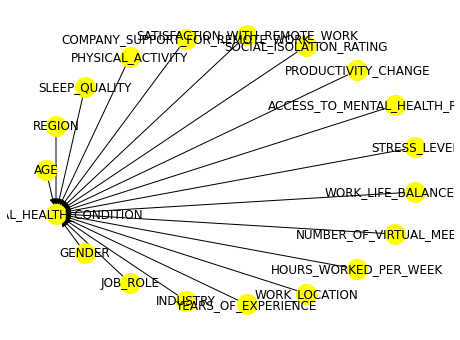

In [17]:

import dowhy
from dowhy import CausalModel

graph="""digraph {
  AGE -> MENTAL_HEALTH_CONDITION;
  GENDER -> MENTAL_HEALTH_CONDITION;
  JOB_ROLE -> MENTAL_HEALTH_CONDITION;
  INDUSTRY -> MENTAL_HEALTH_CONDITION;
  YEARS_OF_EXPERIENCE -> MENTAL_HEALTH_CONDITION;
  WORK_LOCATION -> MENTAL_HEALTH_CONDITION;
  HOURS_WORKED_PER_WEEK -> MENTAL_HEALTH_CONDITION;
  NUMBER_OF_VIRTUAL_MEETINGS -> MENTAL_HEALTH_CONDITION;
  WORK_LIFE_BALANCE_RATING -> MENTAL_HEALTH_CONDITION;
  STRESS_LEVEL -> MENTAL_HEALTH_CONDITION;
  ACCESS_TO_MENTAL_HEALTH_RESOURCES -> MENTAL_HEALTH_CONDITION;
  PRODUCTIVITY_CHANGE -> MENTAL_HEALTH_CONDITION;
  SOCIAL_ISOLATION_RATING -> MENTAL_HEALTH_CONDITION;
  SATISFACTION_WITH_REMOTE_WORK -> MENTAL_HEALTH_CONDITION;
  COMPANY_SUPPORT_FOR_REMOTE_WORK -> MENTAL_HEALTH_CONDITION;
  PHYSICAL_ACTIVITY -> MENTAL_HEALTH_CONDITION;
  SLEEP_QUALITY -> MENTAL_HEALTH_CONDITION;
  REGION -> MENTAL_HEALTH_CONDITION; 
}
    }"""
    

# Define a CausalModel object in DoWhy, indicate treatment & outcome
model= CausalModel(data=data, # data columns
        graph=graph, # DAG
        treatment='AGE', # cause of interest, X
        outcome='MENTAL_HEALTH_CONDITION') # outcome, Y
model.view_model()



In [18]:
# Identify the causal effect

estimands = model.identify_effect(proceed_when_unidentifiable=True)
print(estimands)


Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                               
──────(E[MENTAL_HEALTH_CONDITION])
d[AGE]                            
Estimand assumption 1, Unconfoundedness: If U→{AGE} and U→MENTAL_HEALTH_CONDITION then P(MENTAL_HEALTH_CONDITION|AGE,,U) = P(MENTAL_HEALTH_CONDITION|AGE,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [19]:
estimate = model.estimate_effect(estimands,
                                 method_name="backdoor.linear_regression",
                                 effect_modifiers= [],
                                 confidence_intervals=True,
                                 test_significance=True)
print(estimate)

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': True, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                               
──────(E[MENTAL_HEALTH_CONDITION])
d[AGE]                            
Estimand assumption 1, Unconfoundedness: If U→{AGE} and U→MENTAL_HEALTH_CONDITION then P(MENTAL_HEALTH_CONDITION|AGE,,U) = P(MENTAL_HEALTH_CONDITION|AGE,)

## Realized estimand
b: MENTAL_HEALTH_CONDITION~AGE
Target units: ate

## Estimate
Mean value: -0.0022478878203854857
p-value: [0.89869384]
95.0% confidence interval: [[-0.0368608   0.03236502]]



In [20]:
estimate.interpret()

Increasing the treatment variable(s) [AGE] from 0 to 1 causes an increase of -0.0022478878203854857 in the expected value of the outcome [MENTAL_HEALTH_CONDITION], over the data distribution/population represented by the dataset.


Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
                                                                              
──────────────────────────────────────────────────────────────────────────────
d[AGE  GENDER  JOB_ROLE  INDUSTRY  YEARS_OF_EXPERIENCE  WORK_LOCATION  HOURS_W

                                                                              
──────────────────────────────────────────────────────────────────────────────
ORKED_PER_WEEK  NUMBER_OF_VIRTUAL_MEETINGS  WORK_LIFE_BALANCE_RATING  STRESS_L

                 d                                                            
──────────────────────────────────────────────────────────────────────────────
EVEL  ACCESS_TO_MENTAL_HEALTH_RESOURCES  PRODUCTIVITY_CHANGE  SOCIAL_ISOLATION

                                                                              
──────────────────────────────────────────────────────────────────────────────
_RATING  SATISFACTION_WITH_REMOT

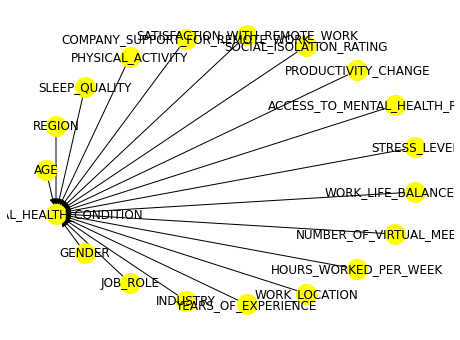

In [21]:
model= CausalModel(data=data, # data columns
        graph=graph, # DAG
        treatment=['AGE', 'GENDER', 'JOB_ROLE', 'INDUSTRY', 'YEARS_OF_EXPERIENCE',
       'WORK_LOCATION', 'HOURS_WORKED_PER_WEEK', 'NUMBER_OF_VIRTUAL_MEETINGS',
       'WORK_LIFE_BALANCE_RATING', 'STRESS_LEVEL', 
       'ACCESS_TO_MENTAL_HEALTH_RESOURCES', 'PRODUCTIVITY_CHANGE',
       'SOCIAL_ISOLATION_RATING', 'SATISFACTION_WITH_REMOTE_WORK',
       'COMPANY_SUPPORT_FOR_REMOTE_WORK', 'PHYSICAL_ACTIVITY', 'SLEEP_QUALITY',
       'REGION'], # cause of interest, X
        outcome='MENTAL_HEALTH_CONDITION') # outcome, Y
model.view_model()

# Identify the causal effect

estimands = model.identify_effect(proceed_when_unidentifiable=True)
print(estimands)

estimate = model.estimate_effect(estimands,
                                 method_name="backdoor.linear_regression",
                                 effect_modifiers= [],
                                 confidence_intervals=True,
                                 test_significance=True)
print(estimate)

In [22]:
estimate.interpret()

Increasing the treatment variable(s) [AGE,GENDER,JOB_ROLE,INDUSTRY,YEARS_OF_EXPERIENCE,WORK_LOCATION,HOURS_WORKED_PER_WEEK,NUMBER_OF_VIRTUAL_MEETINGS,WORK_LIFE_BALANCE_RATING,STRESS_LEVEL,ACCESS_TO_MENTAL_HEALTH_RESOURCES,PRODUCTIVITY_CHANGE,SOCIAL_ISOLATION_RATING,SATISFACTION_WITH_REMOTE_WORK,COMPANY_SUPPORT_FOR_REMOTE_WORK,PHYSICAL_ACTIVITY,SLEEP_QUALITY,REGION] from 0 to 1 causes an increase of 0.008933141169768899 in the expected value of the outcome [MENTAL_HEALTH_CONDITION], over the data distribution/population represented by the dataset.


In [23]:
import statsmodels.formula.api as smf
reg_model_all = smf.ols(formula='MENTAL_HEALTH_CONDITION ~ STRESS_LEVEL', data = data)
ols_all = reg_model_all.fit()
print('Effect of STRESS: \n coeff: \t', ols_all.params['STRESS_LEVEL'],
      '\n p value: \t', ols_all.pvalues.loc['STRESS_LEVEL'],
     '\n 95% C.I.s: \t', ols_all.conf_int(alpha = 0.05).loc['STRESS_LEVEL'].values)

Effect of STRESS: 
 coeff: 	 0.013914596402485022 
 p value: 	 0.2774920602202259 
 95% C.I.s: 	 [-0.01120187  0.03903106]


Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                                   
───────────────(E[MENTAL_HEALTH_CONDITION])
d[STRESS_LEVEL]                            
Estimand assumption 1, Unconfoundedness: If U→{STRESS_LEVEL} and U→MENTAL_HEALTH_CONDITION then P(MENTAL_HEALTH_CONDITION|STRESS_LEVEL,,U) = P(MENTAL_HEALTH_CONDITION|STRESS_LEVEL,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': True, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                                   
───────────────(E[MENTAL_HEALTH_CONDITION])
d[STRESS_LEVEL]         

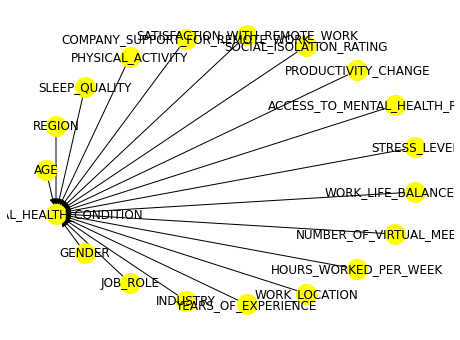

In [24]:
model= CausalModel(data=data, # data columns
        graph=graph, # DAG
        treatment='STRESS_LEVEL', # cause of interest, X
        outcome='MENTAL_HEALTH_CONDITION') # outcome, Y
model.view_model()

# Identify the causal effect

estimands = model.identify_effect(proceed_when_unidentifiable=True)
print(estimands)

estimate = model.estimate_effect(estimands,
                                 method_name="backdoor.linear_regression",
                                 effect_modifiers= [],
                                 confidence_intervals=True,
                                 test_significance=True)
print(estimate)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                                                                      
───────────────(E[MENTAL_HEALTH_CONDITION|ACCESS_TO_MENTAL_HEALTH_RESOURCES,WO
d[STRESS_LEVEL]                                                               

                           
RK_LOCATION,SLEEP_QUALITY])
                           
Estimand assumption 1, Unconfoundedness: If U→{STRESS_LEVEL} and U→MENTAL_HEALTH_CONDITION then P(MENTAL_HEALTH_CONDITION|STRESS_LEVEL,ACCESS_TO_MENTAL_HEALTH_RESOURCES,WORK_LOCATION,SLEEP_QUALITY,U) = P(MENTAL_HEALTH_CONDITION|STRESS_LEVEL,ACCESS_TO_MENTAL_HEALTH_RESOURCES,WORK_LOCATION,SLEEP_QUALITY)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': True, 'evaluate_effect_strength': False, 'confidence_intervals

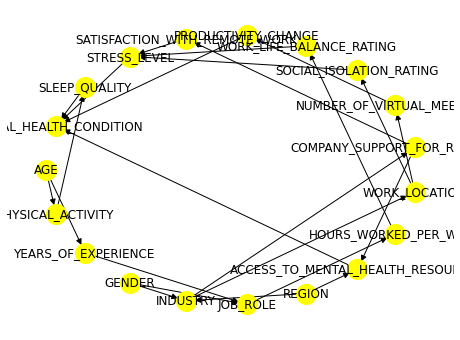

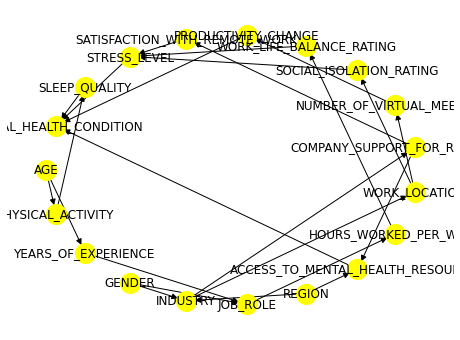

In [30]:
#Based on assumptions


graph="""digraph {
 
  AGE -> PHYSICAL_ACTIVITY;
  AGE -> YEARS_OF_EXPERIENCE;
  GENDER -> INDUSTRY;
  GENDER -> JOB_ROLE;
  REGION -> INDUSTRY;
  REGION -> ACCESS_TO_MENTAL_HEALTH_RESOURCES;
  
  YEARS_OF_EXPERIENCE -> JOB_ROLE;
  JOB_ROLE -> HOURS_WORKED_PER_WEEK;
  INDUSTRY -> WORK_LOCATION;
  INDUSTRY -> COMPANY_SUPPORT_FOR_REMOTE_WORK;
  

  WORK_LOCATION -> NUMBER_OF_VIRTUAL_MEETINGS;
  WORK_LOCATION -> SOCIAL_ISOLATION_RATING;
  HOURS_WORKED_PER_WEEK -> WORK_LIFE_BALANCE_RATING;
  NUMBER_OF_VIRTUAL_MEETINGS -> PRODUCTIVITY_CHANGE;
  

  COMPANY_SUPPORT_FOR_REMOTE_WORK -> ACCESS_TO_MENTAL_HEALTH_RESOURCES;
  COMPANY_SUPPORT_FOR_REMOTE_WORK -> SATISFACTION_WITH_REMOTE_WORK;
  WORK_LIFE_BALANCE_RATING -> STRESS_LEVEL;
  SOCIAL_ISOLATION_RATING -> STRESS_LEVEL;
  SATISFACTION_WITH_REMOTE_WORK -> STRESS_LEVEL;
  PHYSICAL_ACTIVITY -> SLEEP_QUALITY;
  

  ACCESS_TO_MENTAL_HEALTH_RESOURCES -> MENTAL_HEALTH_CONDITION;
  PRODUCTIVITY_CHANGE -> MENTAL_HEALTH_CONDITION;
  STRESS_LEVEL -> MENTAL_HEALTH_CONDITION;
  SLEEP_QUALITY -> MENTAL_HEALTH_CONDITION;
}
    }"""

model= CausalModel(data=data, # data columns
        graph=graph, # DAG
        treatment='STRESS_LEVEL', # cause of interest, X
        outcome='MENTAL_HEALTH_CONDITION') # outcome, Y
model.view_model()




# Visualize causal graph
model.view_model()


# Identify the causal effect

estimands = model.identify_effect(proceed_when_unidentifiable=True)
print(estimands)


#Estimation

estimate = model.estimate_effect(estimands,
                                 method_name="backdoor.linear_regression",
                                 effect_modifiers= [],
                                 confidence_intervals=True,
                                 test_significance=True)
print(estimate)


estimate.interpret()



# REFUTERS

In [31]:
refute1_results=model.refute_estimate(estimands, estimate,
        method_name="random_common_cause")
print(refute1_results)

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effe

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effe

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
Refute: Add a random common cause
Estimated effect:0.013740681531605237
New effect:0.013735471708061959
p value:0.94



In [32]:
refute2_results=model.refute_estimate(estimands, estimate,
        method_name="placebo_treatment_refuter")
print(refute2_results)

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effe

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effe

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
Refute: Use a Placebo Treatment
Estimated effect:0.013740681531605237
New effect:2.22

In [33]:
refute3_results=model.refute_estimate(estimands, estimate,
        method_name="data_subset_refuter")
print(refute3_results)

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effe

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effe

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': []}
Refute: Use a subset of data
Estimated effect:0.013740681531605237
New effect:0.013843900186422882
p value:0.96



In [ ]:
#Final list based on analysis and ATE from both parts of analysis

selected_features = [
    'Sleep_Quality',
    'Region',
    'Job_Role',
    'Years_of_Experience',
    'Number_of_Virtual_Meetings',
    'Hours_Worked_Per_Week',
    'Access_to_Mental_Health_Resources',
    'Stress_Level',
    'Satisfaction_with_Remote_Work',
    'Work_Life_Balance_Rating'
]
